In [2]:
import pandas as pd
import numpy as np
import os
from data_prep import *

import sys
import cv2

sys.path.append('/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/libs')
from preprocessor import Preprocessor


# Steps to organize the ADNI dataset: 

1) Open a folder named "data-ADNI", 

2) inside "data-ADNI" folder, add a subfolder named "raw" , also subfolder named "interim" and put all three csv files there. 

3) into the "raw" folder, add the unzipped data folders which are named as "All_AD_3loc_T1_axial", "All_CN_3loc_T1_axial", "All_MCI_3loc_T1_axial"

4) "# Run this cell to create Step 4" below creates 

        -- inside the interim folder, three folders AD, CN and MCI which contains several slices(there is not a regular number for the number of slices for each subject.)

5) ** Code doesn't work, check try_notebook for attempts ** "# Run this cell to create Step 5" below creates

        -- a folder named "resized", 

        -- inside the resized folder, three folders AD,CN and MCI which contains resized images from the corresponding folders.





In [3]:
# Run this cell to create Step 4

#folder_path = "../data-ADNI/interim"
#os.makedirs(folder_path)

df_AD = pd.read_csv("../data-ADNI/interim/All_AD_3loc_T1_axial_3_26_2024.csv")
new_df_AD= remove_duplicates(df_AD)

data_folder = "../data-ADNI/raw/All_AD_3loc_T1_axial/ADNI"  
data_paths = get_filtrated_data_paths(data_folder, new_df_AD["Image Data ID"].tolist())

new_folder_path = "../data-ADNI/interim/AD"
save_images_to_new_folder(data_paths, new_folder_path)

df_CN = pd.read_csv("../data-ADNI/interim/All_CN_3loc_T1_axial_3_26_2024.csv")
new_df_CN= remove_duplicates(df_CN)

data_folder_CN = "../data-ADNI/raw/All_CN_3loc_T1_axial/ADNI"
data_paths_CN = get_filtrated_data_paths(data_folder_CN, new_df_CN["Image Data ID"].tolist())

new_folder_path_CN = "../data-ADNI/interim/CN"

save_images_to_new_folder(data_paths_CN, new_folder_path_CN)

df_MCI = pd.read_csv("../data-ADNI/interim/All_MCI_3loc_T1_axial_3_26_2024.csv")
new_df_MCI= remove_duplicates(df_MCI)

data_folder_MCI = "../data-ADNI/raw/All_MCI_3loc_T1_axial/ADNI"
data_paths_MCI = get_filtrated_data_paths(data_folder_MCI, new_df_MCI["Image Data ID"].tolist())

new_folder_path_MCI = "../data-ADNI/interim/MCI"

save_images_to_new_folder(data_paths_MCI, new_folder_path_MCI)

In [4]:
# Run this cell to create Step 5

folder_path = "../data-ADNI/resized"
os.makedirs(folder_path)

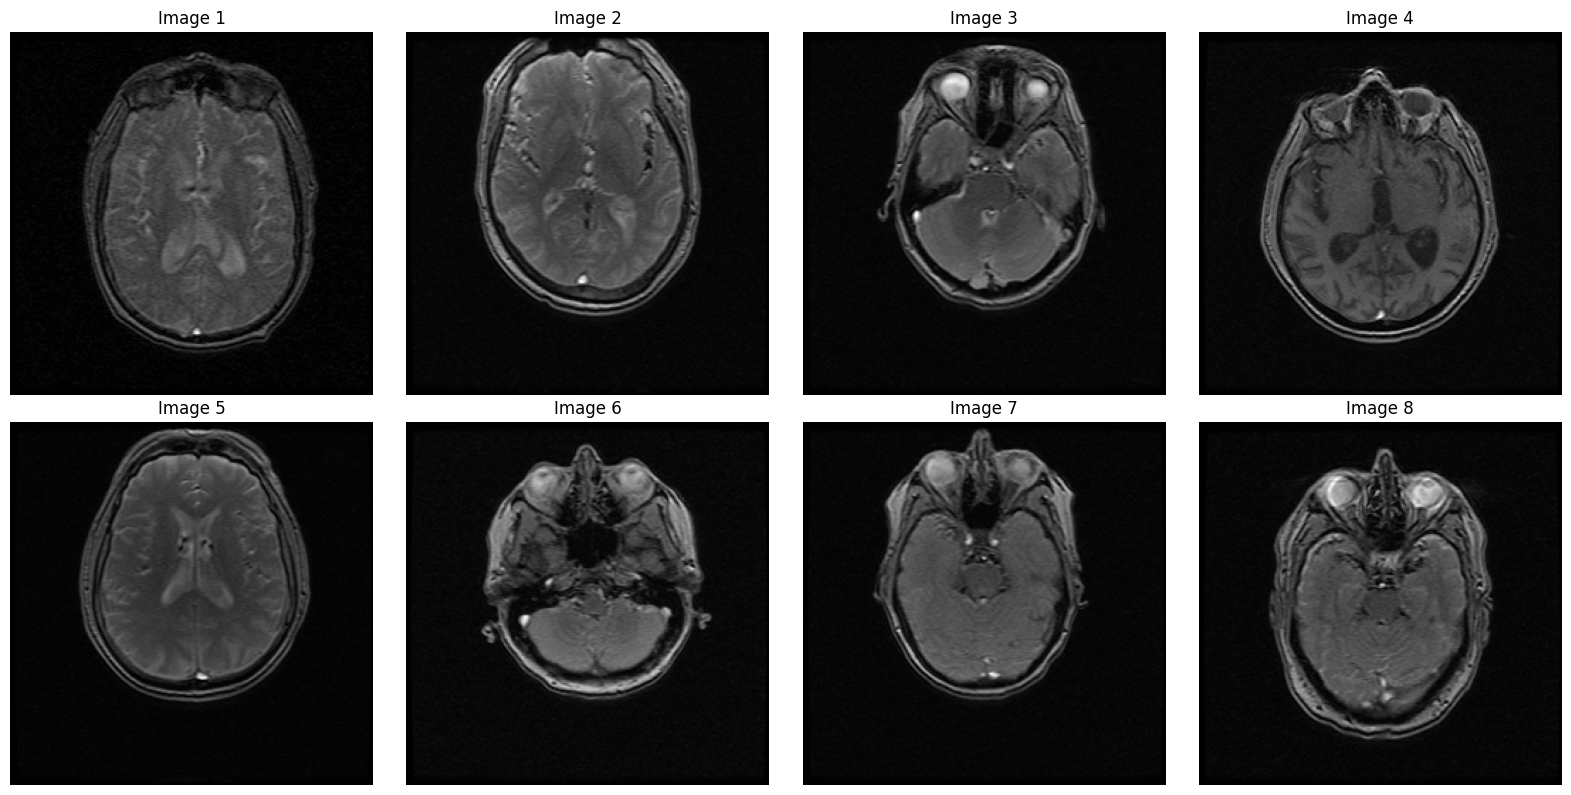

In [5]:
# Some visualizations on why we need to remove the black frame
import matplotlib.pyplot as plt
import pydicom
import os

def plot_8_images(image_paths):
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    for i, image_path in enumerate(image_paths):
        row = i // 4
        col = i % 4

        # Read the DICOM image
        ds = pydicom.dcmread(image_path)
        image = ds.pixel_array

        # Plot the image
        axes[row, col].imshow(image, cmap='gray')
        axes[row, col].axis('off')
        axes[row, col].set_title(f"Image {i+1}")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # List of paths to 8 different DICOM images
    image_paths = [
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_0619_MR_3-plane_localizer__br_raw_20080813225810626_4_S55371_I116116.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_0816_MR_3-plane_localizer__br_raw_20080128222155928_4_S45028_I88800.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_002_S_1018_MR_3-plane_localizer__br_raw_20081212200156638_3_S60830_I130785.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/AD/ADNI_014_S_0356_MR_3-plane_localizer__br_raw_20060406121348075_3_S12854_I12999.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/CN/ADNI_002_S_0559_MR_3-plane_localizer__br_raw_20090701011232829_4_S69296_I147109.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/CN/ADNI_002_S_1261_MR_3-plane_localizer__br_raw_20100225171333357_2_S80479_I166840.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_002_S_0954_MR_3-plane_localizer__br_raw_20080605221019804_2_S51090_I108595.dcm",
        "/Users/cisilkaraguzel/Documents/GitHub/AD_detection_DL_approach/data-ADNI/interim/MCI/ADNI_007_S_0344_MR_3-plane_localizer__br_raw_20100617151743331_4_S87402_I179130.dcm"
    ]

    # Check if all image paths exist
    missing_paths = [path for path in image_paths if not os.path.exists(path)]
    if missing_paths:
        print("Error: Some image paths do not exist:")
        for path in missing_paths:
            print(path)
    else:
        # Plot the images
        plot_8_images(image_paths)
